# Data Collection, Cleaning, and Initial EDA

In [7]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Note about files:

Due to large file size, I am not uploading the actual files into GitHub but below are the instructions to download the files and get this notebook to work:

- Download the Children's Books genre of the Goodreads Datasets -- both the books and the reviews 
- Unzip the .gz container to get the .json file
- Save the .json file into the "data" subfolder
- Read the file in to this notebook. See below.

#### Books

In [9]:
# Read in books file

books = pd.read_json('../data/goodreads_books_children.json', lines=True)

In [3]:
pd.set_option('display.max_columns', None)
books.head(2)

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,1599150603,7,[],US,,"[{'count': '56', 'name': 'to-read'}, {'count':...",,false,4.13,B00DU10PUG,[],"Relates in vigorous prose the tale of Aeneas, ...",Paperback,https://www.goodreads.com/book/show/287141.The...,"[{'author_id': '3041852', 'role': ''}]",Yesterday's Classics,162,13,9781599150604,9,,2006,https://www.goodreads.com/book/show/287141.The...,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46,278578,The Aeneid for Boys and Girls,The Aeneid for Boys and Girls
1,1934876569,6,[151854],US,,"[{'count': '515', 'name': 'to-read'}, {'count'...",,false,4.22,,"[948696, 439885, 274955, 12978730, 372986, 216...","To Kara's astonishment, she discovers that a p...",Paperback,https://www.goodreads.com/book/show/6066812-al...,"[{'author_id': '19158', 'role': ''}]",Seven Seas,216,3,9781934876565,3,,2009,https://www.goodreads.com/book/show/6066812-al...,https://images.gr-assets.com/books/1316637798m...,6066812,98,701117,All's Fairy in Love and War (Avalon: Web of Ma...,All's Fairy in Love and War (Avalon: Web of Ma...


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124082 entries, 0 to 124081
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  124082 non-null  object 
 1   text_reviews_count    124082 non-null  int64  
 2   series                124082 non-null  object 
 3   country_code          124082 non-null  object 
 4   language_code         124082 non-null  object 
 5   popular_shelves       124082 non-null  object 
 6   asin                  124082 non-null  object 
 7   is_ebook              124082 non-null  object 
 8   average_rating        124082 non-null  float64
 9   kindle_asin           124082 non-null  object 
 10  similar_books         124082 non-null  object 
 11  description           124082 non-null  object 
 12  format                124082 non-null  object 
 13  link                  124082 non-null  object 
 14  authors               124082 non-null  object 
 15  

In [5]:
# 124_082 unique books (via book IDs)

len(books['book_id'].unique())

124082

In [6]:
len(books['title'].unique()) #there are different books with similar titles

96354

In [7]:
books[['average_rating', 'ratings_count']].describe()

# Quick look at the following -
# average rating column: range between 0-5; mean of 3.91
# ratings count: range between 0-1.8M ; mean of 523 rating

,average_rating,ratings_count
count,124082.000000,1.240820e+05
mean,3.910883,5.228165e+02
std,0.364855,1.083869e+04
min,0.000000,0.000000e+00
25%,3.710000,1.000000e+01
50%,3.940000,3.000000e+01
75%,4.140000,9.600000e+01
max,5.000000,1.876252e+06


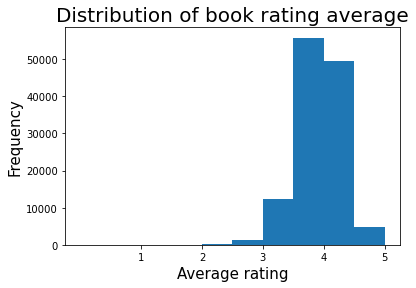

In [34]:
# Disribution of average ratings of books

plt.hist(books['average_rating'])
plt.xticks(ticks=[1,2,3,4,5],labels=[1,2,3,4,5])
plt.xlabel("Average rating", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Distribution of book rating average", fontsize=20);

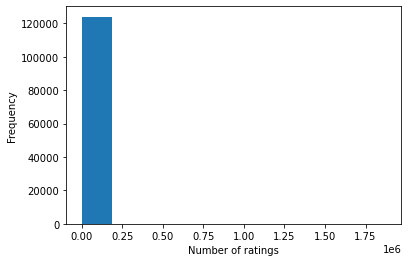

In [9]:
# Distribution of number of ratings of books

plt.hist(books['ratings_count'])
plt.xlabel("Number of ratings")
plt.ylabel("Frequency");

In [10]:
len(books[books['ratings_count'] > 100_000]) # only 85 books with over 100,000 ratings count

85

In [61]:
# Drop duplicates of books with similar titles

books.drop_duplicates(subset='title', keep='first', inplace=True)

#### Reviews

In [19]:
# Read in reviews(ratings) file

reviews = pd.read_json('../data/goodreads_reviews_children.json', lines=True)

In [12]:
reviews.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4,Fun sequel to the original.,Tue Nov 17 11:37:35 -0800 2015,Tue Nov 17 11:38:05 -0800 2015,,,7,0
1,8842281e1d1347389f2ab93d60773d4d,17290220,22d424a2b0057b18fb6ecf017af7be92,5,One of my favorite books to read to my 5 year ...,Sat Nov 08 08:54:03 -0800 2014,Wed Jan 25 13:56:12 -0800 2017,Tue Jan 24 00:00:00 -0800 2017,,4,0
2,8842281e1d1347389f2ab93d60773d4d,6954929,50ed4431c451d5677d98dd25ca8ec106,5,One of the best and most imaginative childrens...,Thu Oct 23 13:46:20 -0700 2014,Thu Oct 23 13:47:00 -0700 2014,,,6,1


In [13]:
reviews.info() #734_640 reviews from users (note that text reviews are different from ratings. We are concerned with the latter.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734640 entries, 0 to 734639
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       734640 non-null  object
 1   book_id       734640 non-null  int64 
 2   review_id     734640 non-null  object
 3   rating        734640 non-null  int64 
 4   review_text   734640 non-null  object
 5   date_added    734640 non-null  object
 6   date_updated  734640 non-null  object
 7   read_at       734640 non-null  object
 8   started_at    734640 non-null  object
 9   n_votes       734640 non-null  int64 
 10  n_comments    734640 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 61.7+ MB


In [14]:
reviews[['rating']].describe()

,rating
count,734640.000000
mean,3.818344
std,1.240084
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [15]:
reviews['rating'].value_counts()

4    253185
5    251400
3    148210
2     40006
0     31113
1     10726
Name: rating, dtype: int64

In [20]:
# note: Rating of 0 means no rating. (meaning user gave a text review, but did not give a rating from 1-5)
# Drop those with "0" ratings

reviews = reviews.loc[reviews['rating'] !=0]

In [21]:
reviews['rating'].value_counts()

4    253185
5    251400
3    148210
2     40006
1     10726
Name: rating, dtype: int64

In [18]:
reviews.shape #confirm only non-zero ratings were selected (734_640 - 31_113 = 703_527)

(703527, 11)

In [19]:
reviews[['rating']].describe()

,rating
count,703527.000000
mean,3.987207
std,0.965671
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [51]:
reviews[['rating']].value_counts(normalize=True)

rating
4         0.359880
5         0.357342
3         0.210667
2         0.056865
1         0.015246
dtype: float64

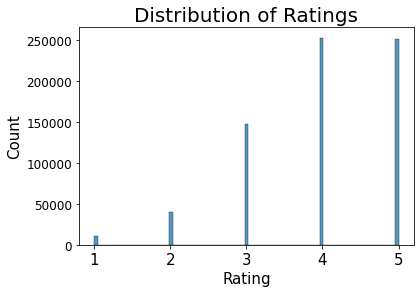

In [32]:
sns.histplot(data=reviews, x='rating')
plt.xticks(ticks=[1,2,3,4,5],labels=[1,2,3,4,5], fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Rating", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Distribution of Ratings", fontsize=20);

In [21]:
len(reviews['book_id'].unique()) #120_135 books with ratings

120135

In [22]:
len(reviews['user_id'].unique()) #90_381 unique users 

90381

In [23]:
# Check frequency of users' ratings

reviews['user_id'].value_counts().describe()

# Half of users only have rated twice
# The mean of users rating frequency is 7.78
# There are outliers

count    90381.000000
mean         7.784014
std         50.358171
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       4481.000000
Name: user_id, dtype: float64

In [36]:
user_frequency = reviews[['user_id']].value_counts()

In [37]:
user_freq = pd.DataFrame(user_frequency, columns = ['freq'])

In [38]:
user_freq.head(3)

,freq
user_id,
9003d274774f4c47e62f77600b08ac1d,4481
97e2ce2141fa1c880967d78aec3c14fa,3898
6ac35fe952c608da50153d64f616291b,2836


In [46]:
len(user_freq[user_freq['freq'] > 100]) # 913 users with over 100 ratings

913

In [45]:
len(user_freq[user_freq['freq'] < 5]) # 70818 users with less than 5 ratings

70818

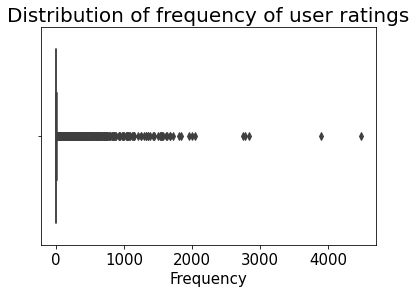

In [42]:
sns.boxplot(data=user_freq, x = 'freq')
plt.title('Distribution of frequency of user ratings',fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel("Frequency", fontsize = 15);

In [48]:
user_df = reviews.groupby(by = ['user_id']).mean()

In [49]:
# Getting the mean rating of the users
# Note that there is imbalance of ratings -- the highest 75% all rated at least 4.
# Mean is 4.23

user_df['rating'].describe()

count    90381.000000
mean         4.224675
std          0.810365
min          1.000000
25%          4.000000
50%          4.333333
75%          5.000000
max          5.000000
Name: rating, dtype: float64

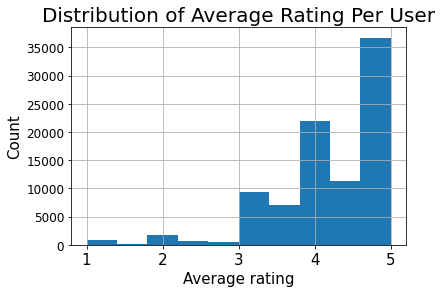

In [50]:
user_df['rating'].hist()
plt.xticks(ticks=[1,2,3,4,5],labels=[1,2,3,4,5], fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("Average rating", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Distribution of Average Rating Per User", fontsize=20);

In [69]:
reviews.groupby(["book_id", "user_id"]).size()[0:3]

book_id  user_id                         
5        0012bfd35fd86467110343447714b389    1
         0021dcf35bb8ddb3e5754779b3a7d690    1
         002eff40d3de8ff36174a48d26d93da7    1
dtype: int64

In [65]:
book_rating_freq = pd.DataFrame(reviews.groupby(["book_id", "user_id"]).size(), columns=['freq'])

In [66]:
book_rating_freq[book_rating_freq['freq'] >1] #results to null, meaning users just rated a book once

,,freq
book_id,user_id,


### Make the dataframe with necessary info for recommendation system

In [70]:
books_final = books[["book_id", "title"]]

In [71]:
reviews_final = reviews[["user_id", "book_id", "rating"]]

In [72]:
df = pd.merge(books_final, reviews_final, on="book_id")

In [73]:
df.head(5)

,book_id,title,user_id,rating
0,287141,The Aeneid for Boys and Girls,fc0fba8c6f515fe897a455b16776a35a,4
1,287141,The Aeneid for Boys and Girls,3b22aeaaa17316ec8d0de319dc2d6ca7,5
2,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,da784e55b4f838941141eeebd87ae137,3
3,89378,Dog Heaven,3e83e94eeea96cb79841f1bb8292ab8a,4
4,89378,Dog Heaven,c10765c997317e4cf75aecdad046fd72,5


In [74]:
df.shape

(436948, 4)

In [75]:
df.isna().sum()

book_id    0
title      0
user_id    0
rating     0
dtype: int64

In [76]:
len(df['book_id'].unique())

93256

In [77]:
len(df['title'].unique())

93256

In [79]:
len(df['user_id'].unique())

58688

In [78]:
df['rating'].value_counts()

4    160621
5    147799
3     96341
2     25673
1      6514
Name: rating, dtype: int64

In [80]:
df.describe()

,book_id,rating
count,4.369480e+05,436948.000000
mean,1.124561e+07,3.955532
std,1.017556e+07,0.962266
min,5.000000e+00,1.000000
25%,1.069585e+06,3.000000
50%,9.470915e+06,4.000000
75%,1.863713e+07,5.000000
max,3.646988e+07,5.000000


In [81]:
df.sort_values(by='book_id', inplace=True, ignore_index=True)

In [82]:
df.shape

(436948, 4)

In [83]:
#df.to_csv('../data/books_reviews_final.csv', index=False)

This final file is where samples will be taken from.